### Breast Cancer Prediction

The purpose of this project is to be able to predict if a patient has breast cancer based on the tumor and other factors. The model that will be used for this project is KMeans clustering to predict if a tumor is benign or malignant. This project is important to me as my mother recently had breast cancer, and an algorithm like this likely led to the discovery of it early. Further investigation of this research could help diagnosing cancer earlier. GitHub link: https://github.com/MichaelButlerDS/BreastCancerPrediction

This data comes from Kaggle https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data.
There are 569 rows of data which include various measurements of the tumor. The data types are float 64 and object. The float data types represent the measurements while the object represents if the tumor was Malignant or Benign.

In [76]:
import pandas as pd
import numpy as np
import itertools
import random
import os
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

Mount Google Drive to bring in Data.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
raw_data = pd.read_csv("drive/MyDrive/ML Files/ML2/data.csv")

Previewing the data and looking at the data types of the fields.

In [46]:
data = raw_data
print(raw_data.head())
data.info()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

The data is 569 rows with 33 columns, of which two will be removed: id and unnamed.

In [47]:
data.shape

(569, 33)

Looking at the data, there do not seem to be any outliers, so the data is ready to be scaled.

In [48]:
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

Data clean up: remove the id and Unnamed empty axis.

In [49]:
data = data.drop('id',axis=1)
data = data.drop('Unnamed: 32',axis=1)
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
data_scaled = pd.DataFrame(preprocessing.scale(data.iloc[:,1:32]))
data_scaled.columns = list(data.iloc[:,1:32].columns)
data_scaled['diagnosis'] = data['diagnosis']

Data below is scaled and normalized.

In [50]:
data_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,...,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16,0.372583
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,0.483918
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,0.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.000000


The data does have some correlated fields, however most are independant. This leads to good model building.

<Axes: >

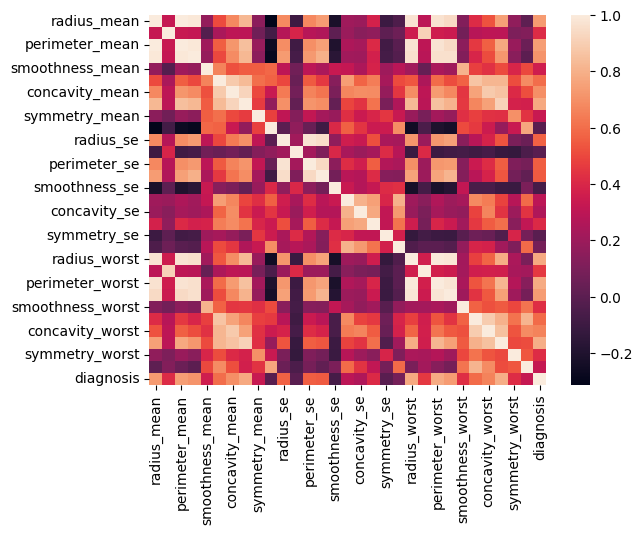

In [51]:
sns.heatmap(data_scaled.corr())

In [52]:
data_drop = data_scaled.drop('diagnosis',axis=1)
X_data = data_drop.values
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.069s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.173897
[t-SNE] KL divergence after 2200 iterations: 0.864980


In [53]:
model = KMeans(n_clusters=2,init='random',max_iter=300, algorithm="elkan", random_state=42)
preds = model.fit_predict(X_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Below shows the comparison between the predicted and actual clusters. The predicted clusters are very close to the actuals. I was very impressed how well the model fit.

Text(0.5, 1.0, 'Predicted Clusters')

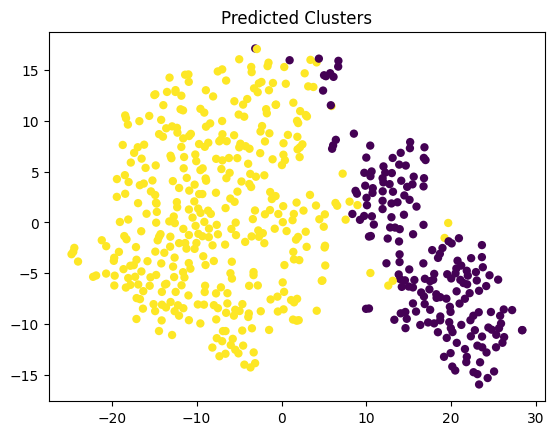

In [54]:
plt.scatter(Y[:,0],Y[:,1],  c=preds, edgecolor = "None")
plt.title('Predicted Clusters')

Text(0.5, 1.0, 'Actual Clusters')

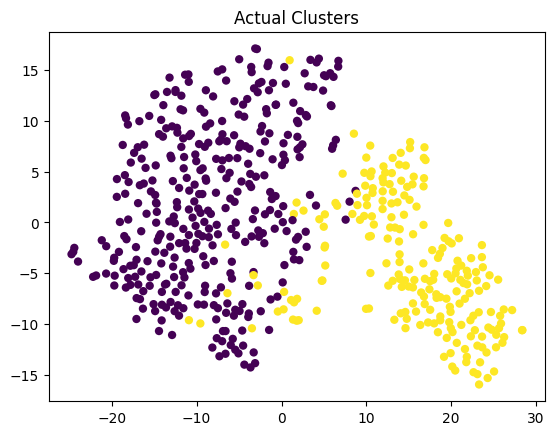

In [55]:
plt.scatter(Y[:,0],Y[:,1],  c = data_scaled['diagnosis'], edgecolor = "None")
plt.title('Actual Clusters')

The below accuracy score shows the same as the plots above, the predicted clusters are more separated than the actual, which makes sense due to the fact that the model assumes boundaries based on the majority of data points.

In [56]:
data['diagnosis_adj'] = (data['diagnosis']-1)*-1
accuracy_score(data['diagnosis_adj'],preds)

0.9103690685413005

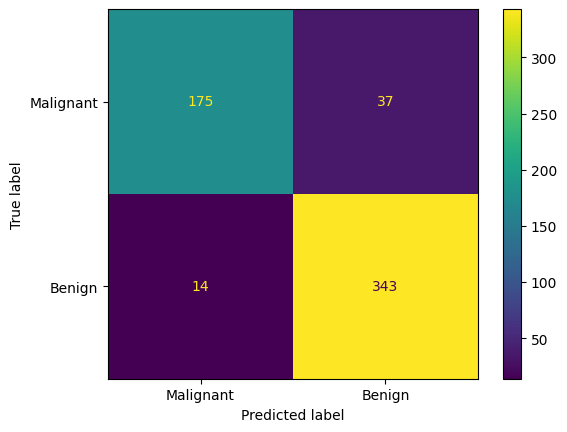

In [60]:
cm = confusion_matrix(list(data['diagnosis_adj']), list(preds))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Malignant', 'Benign'])
disp.plot()

Another model I used to model the breast cancer data is Principal Component Analysis (PCA). This model seems to have a clean break between clusters, but not with the same shape due to the model.

<ipython-input-71-e2d7e6360fbe>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis', c=np.where(data['diagnosis']==1, 'red', 'blue'))


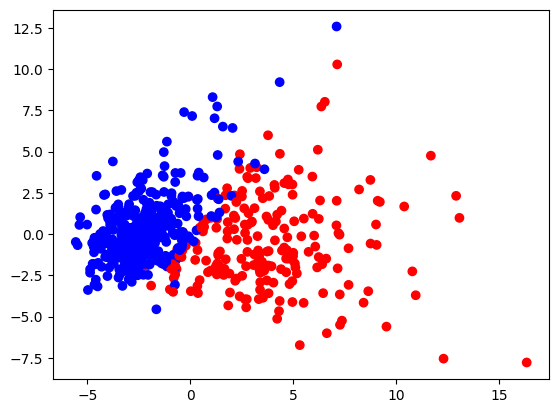

In [71]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_data)
plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis', c=np.where(data['diagnosis']==1, 'red', 'blue'))

Below is an accuracy test of a similar PCA test as above, with PCA lowering the dimensions of the data to 10 and SVC trained on these reduced dimensions.

In [78]:
X_train, X_test, y_train, y_test =
  train_test_split(X_data, data['diagnosis'], test_size = .1, random_state = 42)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9824561403508771


There are some ways to improve this analysis and research moving forward. The ways that I suggest this is to study more data and to find more measurements about the patient themselves. Genetic testing would also be a great avenue to continue improving the prediction of a tumor being cancerous.
The one thing that was interesting is that the model was very good at predicting with out many adjustments to be made.


PCA in combination with SVC was a more accurate model than Kmeans clustering. with an accuracy of .98, without any hyperparameter tuning. Each performed equally well with the size of the data set, but with more data as this set only has 590 rows, these models would be stress tested more with modeling time. The scatter plots are indicative of there are not the clearest margins with there being both false positived and negatives, but there are not many as these are relatively very accurate with Kmeans having an accuracy of .91.

The big takeaway I made from this project was to explore more models. It took a lot of research to find a project that I thought would be interesting, and I learned a lot about different models and how they interact and predict data. I had tried to replicate another project I had completed in the BBC data. However, I decided to go for a challenge to use continuous data.